Sky Kapoor and Chris Compierchio

This program willse use shooting and RK4 to find the bound states of hydrogen for a couple of cases

In [94]:
#import libraries
import numpy as np
import scipy.constants as pc
import scipy.integrate as scint
import matplotlib.pyplot as plt

PART A

In [103]:
#Define Constants
a = 5*10**-11
h = 0.002*a
r_inf = 20*a
hbar = pc.hbar
m = pc.m_e
e = pc.e
target = e/1000
eps = pc.epsilon_0
E0 = 2.179e-18

#Define Schrodinger equation
def schrodinger(R1, S1, r, E, l1):
    fS = l1*(l1+1)*R1 + ((2*m*r**2)/(hbar**2))*(V(r)-E)*R1
    fR = S1/r**2
    return np.array([fR, fS], float)

#define potential energy equation
def V(r):
    return (-e**2)/(4*eps*np.pi*r)

#Define function that uses the RK4 method to solve for R and S
def RK4(E, l):
    R = 0
    S = 1
    Rs = []
    
    for x in np.arange(h, r_inf, h):
        k1 = h*schrodinger(R, S, x, E, l)
        k2 = h*schrodinger(R+0.5*k1[0], S+0.5*k1[1], x+0.5*h, E, l)
        k3 = h*schrodinger(R+0.5*k2[0], S+0.5*k2[1], x+0.5*h, E, l)
        k4 = h*schrodinger(R+k3[0], S+k3[1], x+h, E, l)
        
        R = R + (k1[0] + 2*k2[0] + 2*k3[0]+k4[0])/6
        S = S + (k1[1] + 2*k2[1] + 2*k3[1]+k4[1])/6
        Rs.append(R)
        
    return R, Rs


PART B

In [104]:
#set n and l for 1,0 case
n = 1
l = 0

#set E1 and E2 for 1, 0 case
E1 = -15*e/n**2
E2 = -13*e/n**2

#Use the RK4 function to solve for psi
psi2 = RK4(E1, l)[0]
#Begin a while loop that updates and solves for the energies (secant method)
while abs(E1-E2)>target:
    psi1, psi2 = psi2, RK4(E2, l)[0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)
#Print the results
print("The energy for n = 1, l = 0 is E =",E2/e,"eV")

The energy for n = 1, l = 0 is E = -13.5061537305398 eV


In [110]:
#Repeat the process for the 2,0 case
n = 2
l = 0

E1 = -15*e/n**2
E2 = -13*e/n**2

psi2 = RK4(E1, l)[0]
while abs(E1-E2)>target:
    psi1, psi2 = psi2, RK4(E2, l)[0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)
print("The energy for n = 2, l = 0 is E =",E2/e,"eV")

The energy for n = 2, l = 0 is E = -3.3880892417456456 eV


In [106]:
#Repeat the process for the 2,1 case
n = 2
l = 1

E1 = -15*e/n**2
E2 = -13*e/n**2

psi2 = RK4(E1, l)[0]
while abs(E1-E2)>target:
    psi1, psi2 = psi2, RK4(E2, l)[0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)
print("The energy for n = 2, l = 1 is E =",E2/e,"eV")

The energy for n = 2, l = 1 is E = -3.401077196225995 eV


PART C

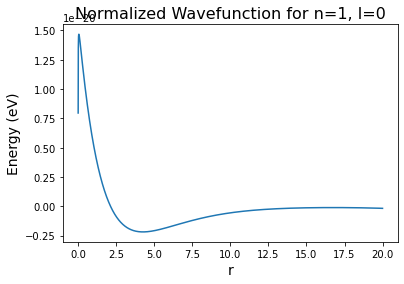

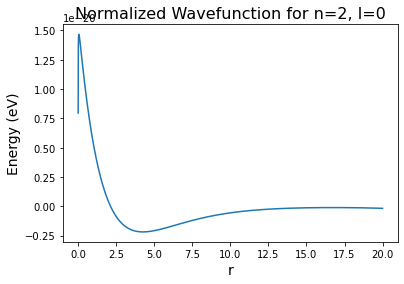

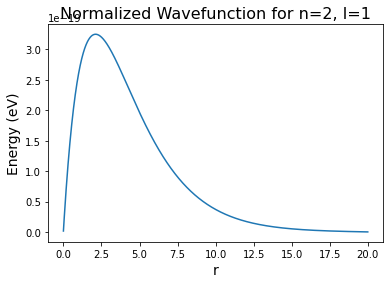

In [108]:
#define a range of r values
r = np.arange(0, r_inf, h)

#Define a function that will both integrate using the Simpsons method and normalize the integral
def Simpson(f, a, b, n, R):
    
    h = (b - a) / n
    integral = f(a)**2 + f(b)**2
    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)**2
    for i in range(2, n, 2):
        integral += 2 * f(a + i * h)**2
    int1 = (1/3) * h * integral
    
    integral2 = R[0]**2 + R[-1]**2
    for i in range(1, len(R), 2):
        integral += 4 * R[i]**2
    for i in range(2, len(R), 2):
        integral += 2 * R[i]**2
    int2 = (1/3)*(h/a)*integral
    
    return int1, int2

#Define functions for the analytical solutions for each case
def R10(r):
    return (1/(np.sqrt(np.pi)*a**(3/2))*np.e**(-r/(a)))
            
def R20(r):
    return 1/(4*np.sqrt(np.pi)*a**(3/2))*(2-(r/a))*np.e**(-r/(2*a))
            
def R21(r):
    return 1/(4*np.sqrt(np.pi)*a**(3/2))*(r/a)*np.e**(-r/(2*a))

#Normalize and plot each case
n = 1
l = 0

normalized = np.sqrt(Simpson(R10, h, r_inf, len(RK4(E2, l)[1]), RK4(E2, l)[1])[0])

plt.plot((r/a)[:9999], RK4(E2, l)[1]/Simpson(R10, h, r_inf, len(RK4(E2, l)[1]), solve(E2, l)[1])[1])
plt.title("Normalized Wavefunction for n=1, l=0", fontsize = 16)
plt.xlabel("r", fontsize = 14)
plt.ylabel("Energy (eV)", fontsize = 14)
plt.show()

n = 2
l = 0

normalized = np.sqrt(Simpson(R20, h, r_inf, len(solve(E2, l)[1]), solve(E2, l)[1])[0])

plt.plot((r/a)[:9999], RK4(E2, l)[1]/Simpson(R10, h, r_inf, len(RK4(E2, l)[1]), solve(E2, l)[1])[1])
plt.title("Normalized Wavefunction for n=2, l=0", fontsize = 16)
plt.xlabel("r", fontsize = 14)
plt.ylabel("Energy (eV)", fontsize = 14)
plt.show()

n = 2
l = 1

normalized = np.sqrt(Simpson(R21, h, r_inf, len(RK4(E2, l)[1]), RK4(E2, l)[1])[0])

plt.plot((r/a)[:9999], RK4(E2, l)[1]/Simpson(R10, h, r_inf, len(RK4(E2, l)[1]), solve(E2, l)[1])[1])
plt.title("Normalized Wavefunction for n=2, l=1", fontsize = 16)
plt.xlabel("r", fontsize = 14)
plt.ylabel("Energy (eV)", fontsize = 14)
plt.show()